## Text Data Mining


Mostly adapted from: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import arff
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm

from sklearn import tree, linear_model, metrics, dummy, naive_bayes, neighbors

from IPython.display import Image
import pydotplus

import nltk
import gensim
import wordcloud

import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim

In [2]:
sns.set_context("paper")
sns.set_style("ticks")

def get_confusion_matrix(clf, X, y, verbose=True, classes=None):
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y_true=y, y_pred=y_pred)
    clf_report = metrics.classification_report(y, y_pred)
    if classes is None:
        classes = clf.classes_
    df_cm = pd.DataFrame(cm, columns=classes, index=classes)
    if verbose:
        print clf_report
        print df_cm
    return clf_report, df_cm

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [5]:
twenty_train.data[0]

u'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [6]:
twenty_train.target[0]

1

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
classification_categories = ["soc.religion.christian", "sci.med"]

In [9]:
classes = np.array(twenty_train.target_names)

In [10]:
classes

array(['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], 
      dtype='|S22')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

## Show how to get help on functions

In [12]:
CountVectorizer?

In [13]:
count_vec = CountVectorizer(stop_words="english", token_pattern="[a-z]+")

In [14]:
X_train_counts = count_vec.fit_transform(twenty_train.data)
X_test_counts = count_vec.transform(twenty_test.data)

In [15]:
print "X_train_counts.shape =", X_train_counts.shape
print "X_test_counts.shape =", X_test_counts.shape

X_train_counts.shape = (2257, 30877)
X_test_counts.shape = (1502, 30877)


In [16]:
count_vec.vocabulary_.items()[:10]

[(u'raining', 22239),
 (u'uhura', 28449),
 (u'schlegel', 24205),
 (u'hordes', 12488),
 (u'moskowitz', 17773),
 (u'foul', 10438),
 (u'tilton', 27646),
 (u'compatable', 5071),
 (u'circuitry', 4515),
 (u'pantheistic', 19750)]

In [17]:
count_vec.get_feature_names()[100:110]

[u'absent',
 u'absitinence',
 u'absol',
 u'absolute',
 u'absolutely',
 u'absolutes',
 u'absolutism',
 u'absolutist',
 u'absolve',
 u'absorb']

In [18]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train_counts, twenty_train.target)
report, df_cm = get_confusion_matrix(clf, X_train_counts, twenty_train.target, classes=twenty_train.target_names)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       0.99      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      0.99      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     479              0        0   
comp.graphics                     0            584        0   
sci.med                           0              2      592   
soc.religion.christian            0              3        0   

                        soc.religion.christian  
alt.atheism                                  1  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     596  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,479,0,0,1
comp.graphics,0,584,0,0
sci.med,0,2,592,0
soc.religion.christian,0,3,0,596


## Using pipelines

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
clf = Pipeline([
        ("vect", CountVectorizer(stop_words="english", token_pattern="[a-z]+")),
        ("nb_clf", naive_bayes.MultinomialNB())
    ])

In [21]:
X = twenty_train.data
y = twenty_train.target
classes = twenty_train.target_names
clf.fit(X, y)
report, df_cm = get_confusion_matrix(clf, X, y, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       0.99      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      0.99      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     479              0        0   
comp.graphics                     0            584        0   
sci.med                           0              2      592   
soc.religion.christian            0              3        0   

                        soc.religion.christian  
alt.atheism                                  1  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     596  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,479,0,0,1
comp.graphics,0,584,0,0
sci.med,0,2,592,0
soc.religion.christian,0,3,0,596


In [22]:
clf.classes_

array([0, 1, 2, 3])

In [23]:
clf.predict(twenty_test.data[:10])

array([2, 2, 2, 0, 3, 0, 1, 3, 2, 2])

In [24]:
report, df_cm = get_confusion_matrix(clf, twenty_test.data, twenty_test.target, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       319
          1       0.95      0.97      0.96       389
          2       0.96      0.93      0.94       396
          3       0.94      0.96      0.95       398

avg / total       0.94      0.94      0.94      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     289              4        6   
comp.graphics                     6            376        6   
sci.med                          12             12      369   
soc.religion.christian            5              4        5   

                        soc.religion.christian  
alt.atheism                                 20  
comp.graphics                                1  
sci.med                                      3  
soc.religion.christian                     384  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,289,4,6,20
comp.graphics,6,376,6,1
sci.med,12,12,369,3
soc.religion.christian,5,4,5,384


## Using logistic regression

In [25]:
clf = Pipeline([
        ("vect", CountVectorizer(stop_words="english", token_pattern="[a-z]+")),
        ("nb_clf", linear_model.LogisticRegression(multi_class="multinomial", solver="lbfgs"))
    ])

In [26]:
X = twenty_train.data
y = twenty_train.target
classes = twenty_train.target_names
clf.fit(X, y)
report, df_cm = get_confusion_matrix(clf, X, y, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       480
          1       1.00      1.00      1.00       584
          2       1.00      1.00      1.00       594
          3       1.00      1.00      1.00       599

avg / total       1.00      1.00      1.00      2257

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     480              0        0   
comp.graphics                     0            584        0   
sci.med                           0              0      594   
soc.religion.christian            0              0        0   

                        soc.religion.christian  
alt.atheism                                  0  
comp.graphics                                0  
sci.med                                      0  
soc.religion.christian                     599  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,480,0,0,0
comp.graphics,0,584,0,0
sci.med,0,0,594,0
soc.religion.christian,0,0,0,599


In [27]:
report, df_cm = get_confusion_matrix(clf, twenty_test.data, twenty_test.target, classes=classes)
df_cm

             precision    recall  f1-score   support

          0       0.93      0.79      0.86       319
          1       0.88      0.95      0.91       389
          2       0.93      0.86      0.90       396
          3       0.87      0.97      0.92       398

avg / total       0.90      0.90      0.90      1502

                        alt.atheism  comp.graphics  sci.med  \
alt.atheism                     253             12       12   
comp.graphics                     3            368       13   
sci.med                          11             33      342   
soc.religion.christian            5              6        1   

                        soc.religion.christian  
alt.atheism                                 42  
comp.graphics                                5  
sci.med                                     10  
soc.religion.christian                     386  


,alt.atheism,comp.graphics,sci.med,soc.religion.christian
alt.atheism,253,12,12,42
comp.graphics,3,368,13,5
sci.med,11,33,342,10
soc.religion.christian,5,6,1,386


## Text exploration

## Word clouds

In [28]:
text = " ".join(twenty_train.data)

In [29]:
wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)

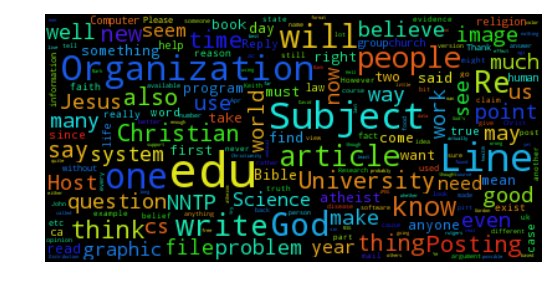

In [30]:
plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [31]:
def get_words_of_class(data, labels, c=0, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    labels = np.array(labels)
    idx = np.where(labels==c)[0]
    text = " ".join(data[i] for i in idx)
    wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
    ax.imshow(wc)
    ax.axis("off")
    return ax

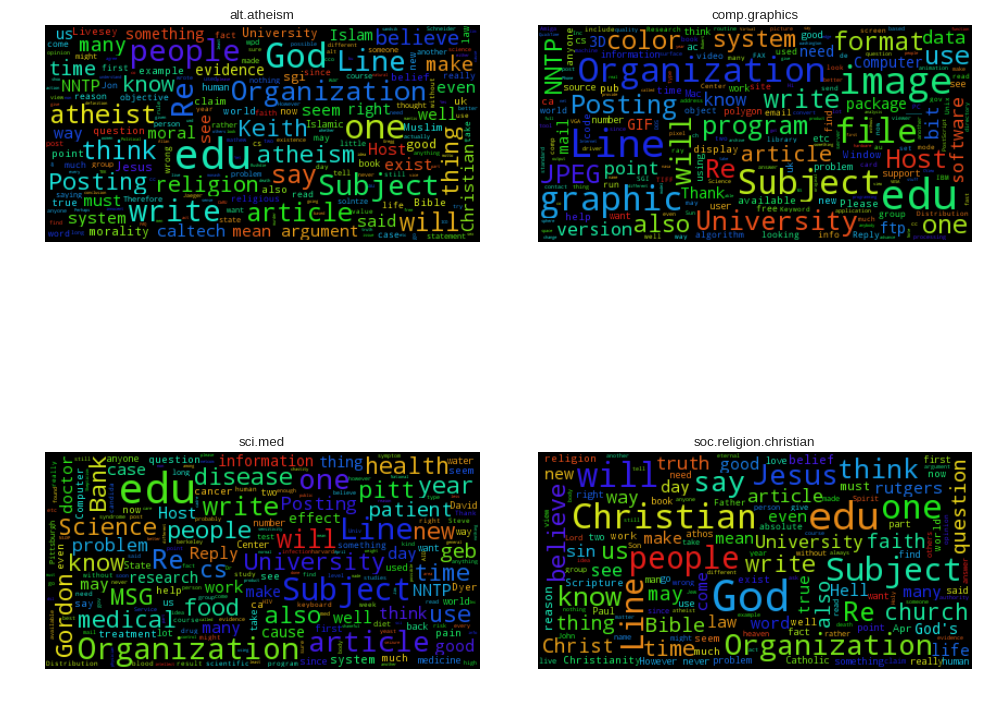

In [32]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
labels = twenty_train.target
data = twenty_train.data
classes = twenty_train.target_names
for i, axi in enumerate(ax):
    get_words_of_class(data, labels, c=i, ax=axi)
    axi.set_title(classes[i])
fig.tight_layout()
    

## Topic Modelling

In [33]:
from nltk.corpus import movie_reviews

In [34]:
movie_reviews.categories()

[u'neg', u'pos']

In [35]:
movie_reviews.words()

[u'plot', u':', u'two', u'teen', u'couples', u'go', ...]

In [36]:
sents = movie_reviews.sents()

In [37]:
len(sents)

71532

In [38]:
sents[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [39]:
for i, s in enumerate(sents[:10]):
    print "S[%s]:\t%s" % (i, " ".join(s))

S[0]:	plot : two teen couples go to a church party , drink and then drive .
S[1]:	they get into an accident .
S[2]:	one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
S[3]:	what ' s the deal ?
S[4]:	watch the movie and " sorta " find out .
S[5]:	.
S[6]:	.
S[7]:	critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .
S[8]:	which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly .
S[9]:	they seem to have taken this pretty neat concept , but executed it terribly .


In [40]:
bigrams = gensim.models.Phrases(sents[:100])

In [41]:
bigrams.vocab.items()[0:10]

[('of_making', 1),
 ('and_most', 1),
 ('mir_)', 1),
 ('keeping_score', 1),
 ('"_into', 1),
 ('before_it', 1),
 ('the_tale', 1),
 ('they_are', 4),
 ('i_checked', 1),
 ('poorly', 2)]

In [42]:
sorted(bigrams.vocab.iteritems(), key=lambda x: x[1], reverse=True)[:10]

[(',', 116),
 ('the', 112),
 ('.', 86),
 ("'", 67),
 ('and', 50),
 ('a', 47),
 ('of', 46),
 ('it', 45),
 ("'_s", 40),
 ('s', 40)]

In [43]:
word_frequencies = map(lambda x: x[1], bigrams.vocab.iteritems())

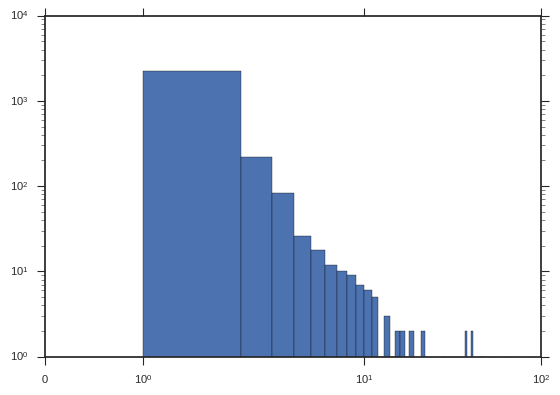

In [44]:
plt.hist(word_frequencies, bins=range(0,100), log=True)
plt.xscale("symlog")

In [45]:
sorted(filter(lambda x: isinstance(x[0], str) and "_" in x[0], 
        bigrams.vocab.iteritems()), key=lambda x: x[1], reverse=True)[:30]

[("'_s", 40),
 ("'_t", 16),
 (',_and', 13),
 (',_but', 11),
 ("it_'", 10),
 ('the_film', 9),
 ('there_are', 9),
 ('that_the', 8),
 ('of_the', 8),
 ('/_10', 8),
 ('10_)', 8),
 (',_it', 8),
 (')_-', 7),
 ("don_'", 7),
 (',_there', 6),
 (')_,', 6),
 ('with_the', 6),
 (',_the', 6),
 ('film_is', 6),
 ('and_the', 5),
 ('for_the', 5),
 ('they_are', 4),
 ('the_movie', 4),
 ('the_characters', 4),
 ('in_a', 4),
 ('this_film', 4),
 ('on_the', 4),
 (',_as', 4),
 ('most_of', 4),
 ('of_a', 4)]

In [46]:
corpus = bigrams[sents[:100]]
id2word = gensim.corpora.Dictionary(corpus)

In [47]:
len(id2word.keys())

804

In [48]:
corpus_processed = [id2word.doc2bow(k) for k in corpus]
print len(corpus_processed)

100


In [49]:
corpus_processed[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [50]:
corpus[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [51]:
LDA_model = gensim.models.ldamodel.LdaModel(corpus_processed, num_topics=10, id2word=id2word)

In [52]:
LDA_model.print_topics()

[(0,
  u'0.044*, + 0.033*\'_s + 0.026*" + 0.019*. + 0.018*it + 0.014*the + 0.012*from + 0.011*here + 0.010*is + 0.010*!'),
 (1,
  u'0.043*the + 0.021*. + 0.019*, + 0.015*of + 0.013*a + 0.012*\'_t + 0.012*" + 0.011*-- + 0.011*are + 0.010*as'),
 (2,
  u'0.046*the + 0.044*, + 0.026*. + 0.022*and + 0.016*of + 0.015*that + 0.013*a + 0.013*( + 0.013*) + 0.012*to'),
 (3,
  u"0.046*, + 0.039*. + 0.032*the + 0.023*it + 0.023*- + 0.023*a + 0.022*'_s + 0.021*of + 0.021*to + 0.015*is"),
 (4,
  u"0.042*, + 0.037*a + 0.033*. + 0.026*and + 0.022*it + 0.020*of + 0.018*'_s + 0.017*the + 0.014*that + 0.012*is"),
 (5,
  u'0.049*the + 0.024*. + 0.020*to + 0.017*is + 0.015*it + 0.014*, + 0.013*that + 0.012*with + 0.012*and + 0.011*over'),
 (6,
  u'0.048*the + 0.028*, + 0.020*and + 0.019*. + 0.018*is + 0.014*it + 0.014*of + 0.009*there_are + 0.008*with + 0.008*to'),
 (7,
  u'0.053*, + 0.033*the + 0.024*there_are + 0.021*and + 0.019*. + 0.016*a + 0.014*of + 0.014*are + 0.012*? + 0.011*not'),
 (8,
  u'0.050*t

In [53]:
LDA_model.get_document_topics(corpus_processed[0])

[(1, 0.9470493948340647)]

In [54]:
doc_topics = LDA_model[corpus_processed]

In [55]:
doc_topics[1]

[(0, 0.014291850397667236),
 (1, 0.014286819505936925),
 (2, 0.014289516171850706),
 (3, 0.87140543297472184),
 (4, 0.014288984078873959),
 (5, 0.014288661635086545),
 (6, 0.014286836975772052),
 (7, 0.014289446370743256),
 (8, 0.014286076345117683),
 (9, 0.014286375544229695)]

In [56]:
pyLDAvis.gensim.prepare(LDA_model, corpus_processed,
                        id2word)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      29.688344        1       1 -0.024341 -0.088442
2      14.755949        1       2 -0.061470 -0.000800
9      11.095532        1       3 -0.037989 -0.003512
7      11.074327        1       4 -0.051635  0.064213
4       9.573107        1       5 -0.006079 -0.074211
0       6.595570        1       6  0.126283  0.000752
5       5.779649        1       7  0.010350  0.007531
1       4.640396        1       8 -0.028880  0.042727
8       3.417549        1       9  0.045732  0.007900
6       3.379576        1      10  0.028030  0.043841, topic_info=     Category       Freq       Term      Total  loglift  logprob
term                                                            
594   Default  81.000000        the  81.000000  30.0000  30.0000
221   Default  89.000000          ,  89.000000  29.0000  29.0000
626   Default  31.000000        '_s  31.000000  28.0000  28.0000
547   Default  34.000000         it  34.000000  27.0000  27.0000
311   Default  22.000000          "  22.000000  26.0000  26.0000
791   Default   8.000000  there_are   8.000000  25.0000  25.0000
189   Default  37.000000          a  37.000000  24.0000  24.0000
351   Default  38.000000        and  38.000000  23.0000  23.0000
545   Default  27.000000         is  27.000000  22.0000  22.0000
510   Default  65.000000          .  65.000000  21.0000  21.0000
740   Default  10.000000       with  10.000000  20.0000  20.0000
697   Default  35.000000         of  35.000000  19.0000  19.0000
325   Default  26.000000       that  26.000000  18.0000  18.0000
15    Default  28.000000         to  28.000000  17.0000  17.0000
107   Default   8.000000       from   8.000000  16.0000  16.0000
678   Default   7.000000          ?   7.000000  15.0000  15.0000
769   Default  11.000000       film  11.000000  14.0000  14.0000
454   Default   9.000000        are   9.000000  13.0000  13.0000
693   Default  14.000000         on  14.000000  12.0000  12.0000
623   Default  13.000000        '_t  13.000000  11.0000  11.0000
763   Default   8.000000         as   8.000000  10.0000  10.0000
208   Default   3.000000       over   3.000000   9.0000   9.0000
586   Default   7.000000          i   7.000000   8.0000   8.0000
159   Default   2.000000          !   2.000000   7.0000   7.0000
640   Default   4.000000         --   4.000000   6.0000   6.0000
214   Default   4.000000        its   4.000000   5.0000   5.0000
607   Default   3.000000    baldwin   3.000000   4.0000   4.0000
237   Default   9.000000       they   9.000000   3.0000   3.0000
239   Default   7.000000        not   7.000000   2.0000   2.0000
598   Default   5.000000       just   5.000000   1.0000   1.0000
...       ...        ...        ...        ...      ...      ...
242   Topic10   0.332797       name   1.143359   2.1532  -5.4328
71    Topic10   0.497382     poorly   1.827290   2.0862  -5.0310
26    Topic10   0.497375      every   1.890106   2.0524  -5.0310
210   Topic10   0.331877      years   1.280804   2.0369  -5.4356
687   Topic10   0.292313  criminals   1.144146   2.0228  -5.5625
489   Topic10   0.497371      comes   1.955006   2.0186  -5.0310
20    Topic10   0.287976    sitting   1.318109   1.8663  -5.5775
369   Topic10   0.287607       also   1.318424   1.8648  -5.5788
794   Topic10   0.279208        ago   1.325560   1.8298  -5.6084
104   Topic10   0.497384       plot   2.370880   1.8258  -5.0310
289   Topic10   0.270916    shelves   1.332607   1.7943  -5.6385
504   Topic10   0.377565       late   1.932623   1.7545  -5.3066
127   Topic10   0.381894       1960   1.964181   1.7497  -5.2952
16    Topic10   0.370598      under   1.920438   1.7422  -5.3252
635   Topic10   0.370889        mod   1.979670   1.7126  -5.3245
320   Topic10   0.248631    wrapped   1.351544   1.6944  -5.7244
370   Topic10   0.340526      squad   1.980189   1.6270  -5.4099
594   Topic10   3.667722        the  81.352837   0.2882  -3